In [1]:
%load_ext autoreload
%autoreload 2

# Process raw wikipedia subset data
This notebook processes the raw wikipedia subset data and extracts the labelled entities and relations, which are then stored in a knowledge graph.

In [2]:
import spacy
from spacy import displacy

import preprocessor
from preprocessor import Preprocessor

ROOT_DIR = preprocessor.ROOT_DIR
DATA_PATH = preprocessor.DATA_PATH

preprocessor = Preprocessor(ROOT_DIR)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niels\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## 1. Load dataset and model
### 1.1 Load Wikipedia subset data

In [3]:
unesco_wikipedia_pages = preprocessor.loadFile(f"unesco_wikipedia_titles.json")

### 1.2 Load best NER model from training

In [22]:
options = {
    "colors": {"location": "lightyellow",
               "person_name": "lightgreen",
               "landmark_name": "lightred",
               "condition": "lightblue"}
}

# Now test teh newly created spacy model on a sample text and visualize it using spacy
nlp_ner = spacy.load("ner_model/training/model-best/")
nlp_rel = spacy.load("rel_model/training/model-best/")

OSError: [E050] Can't find model 'rel_model/training/model-best/'. It doesn't seem to be a Python package or a valid path to a data directory.

## 2. Extract entities and relations
### 2.1 Extract entities using best NER model

In [23]:
example_text = unesco_wikipedia_pages[0]['text']
doc_ner = nlp_ner(example_text)

displacy.render(doc_ner, style="ent", jupyter=True, options=options)

# Show the tokens, their labels and their entities
for ent in doc_ner.ents:
    print(ent.text, ent.label_)

Ajanta Caves landmark_name
Ajanta Caves landmark_name
Jataka landmark_name


### 2.2 Extract relations

In [21]:
doc_rel = nlp_rel(doc_ner)

ModuleNotFoundError: No module named 'rel_pipe'

## 3. Store entities and relations in knowledge graph

In [17]:
from knowledge_graph import knowledgeGraph
graph = knowledgeGraph()

### 3.1 TEMPORARY VARIABLES TO BE REPLACED WITH ACTUAL DATA

In [19]:
all_data = [{"id": "tBYLAMaY7Q", "type": "labels", "value": {"end": 18, "text": "Chartres Cathedral", "start": 0, "labels": ["landmark_name"]}},
             {"id": "rXo1WB9tDL", "type": "labels", "value": {"end": 71, "text": "Cathedral of Our Lady of Chartres", "start": 38, "labels": ["landmark_name"]}},
                {"id": "8FJnNiKvM2", "type": "labels", "value": {"end": 116, "text": "France", "start": 110, "labels": ["location"]}},
                 {"id": "3VbdkKDmSx", "type": "labels", "value": {"end": 363, "text": "episcopal", "start": 354, "labels": ["people"]}},
                  {"id": "fWOLrqi2qp", "type": "labels", "value": {"end": 492, "text": "High Gothic and Classic Gothic architecture", "start": 449, "labels": ["type"]}}]

all_relations = [('Chartres Cathedral', 'France', 'LocatedIn'),('Cathedral of Our Lady of Chartres', 'France', 'LocatedIn'),('Chartres Cathedral', 'episcopal', 'HasProperty'),('Chartres Cathedral', 'High Gothic and Classic Gothic architecture', 'HasType'),
                 ('Cathedral of Our Lady of Chartres', 'episcopal', 'HasProperty'),('Cathedral of Our Lady of Chartres', 'High Gothic and Classic Gothic architecture', 'HasTest'),
                 ('Cathedral of Our Lady of Chartres','Chartres Cathedral', 'is_similar_to')]

### 3.2 Store data in knowledge graph and draw graph

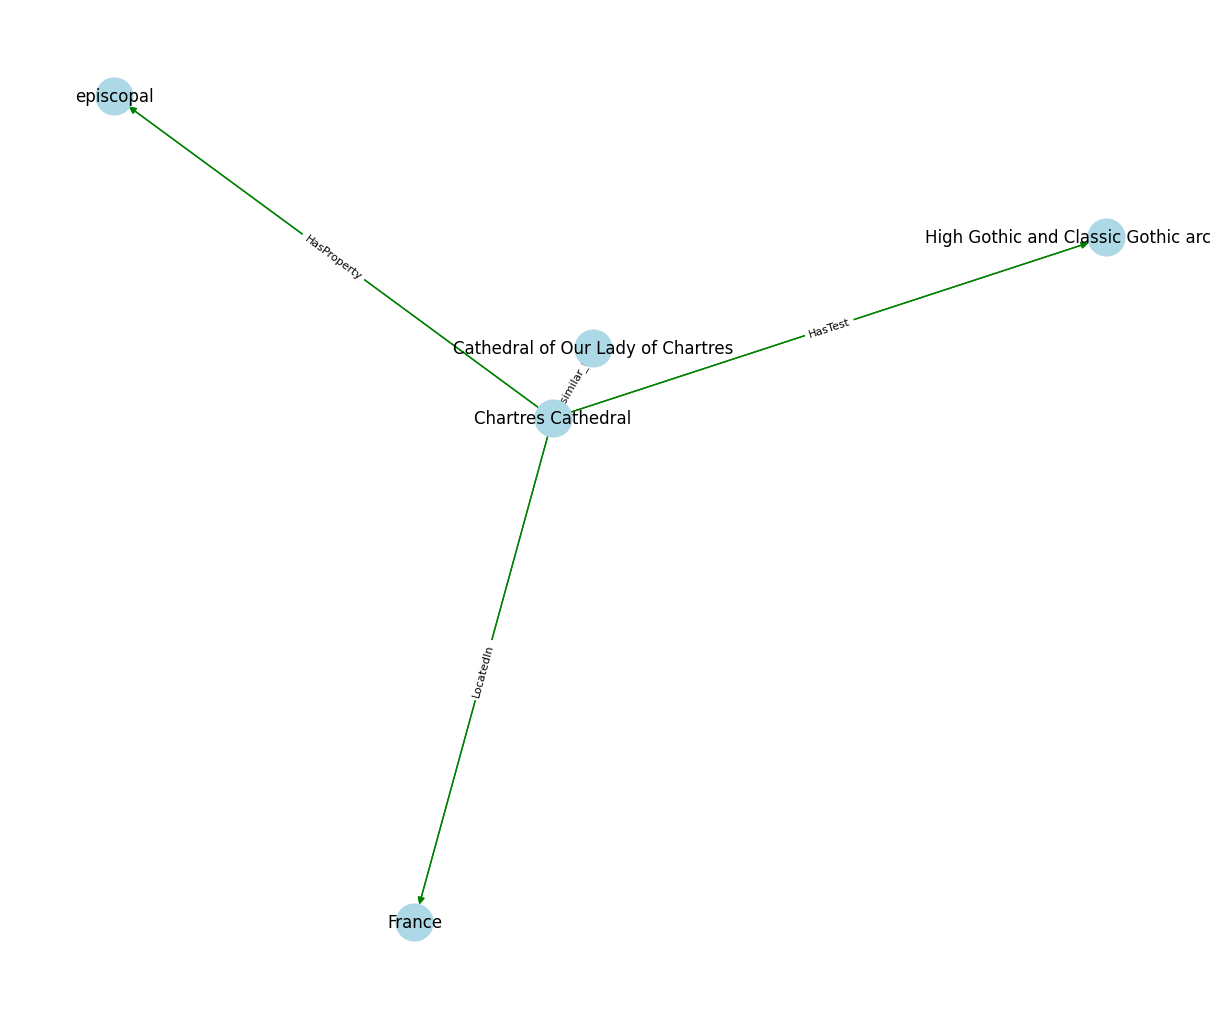

Nodes:
('Cathedral of Our Lady of Chartres', {'labels': ['landmark_name']})
('Chartres Cathedral', {'labels': ['landmark_name']})
('France', {'labels': ['location']})
('episcopal', {'labels': ['people']})
('High Gothic and Classic Gothic architecture', {'labels': ['type']})
Edges:
('Cathedral of Our Lady of Chartres', 'Chartres Cathedral', {'label': 'is_similar_to'})
('Cathedral of Our Lady of Chartres', 'Chartres Cathedral', {'label': 'is_similar_to'})
('Chartres Cathedral', 'France', {'label': 'LocatedIn'})
('Chartres Cathedral', 'France', {'label': 'LocatedIn'})
('Chartres Cathedral', 'episcopal', {'label': 'HasProperty'})
('Chartres Cathedral', 'episcopal', {'label': 'HasProperty'})
('Chartres Cathedral', 'High Gothic and Classic Gothic architecture', {'label': 'HasType'})
('Chartres Cathedral', 'High Gothic and Classic Gothic architecture', {'label': 'HasTest'})


In [20]:
graph.draw_graph(all_relations=all_relations, all_data=all_data)